##Import liberaries

##Uploading the data

In [ ]:
#Uploading the training and testing data. It is an excel document
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
path = '/content/drive/MyDrive/cervical_cancer.csv'

In [ ]:
df_cancer = pd.read_csv(path)
df_cancer

,Age,Number of sexual partners,First sexual intercourse,Num of pregnancies,Smokes,Smokes (years),Smokes (packs/year),Hormonal Contraceptives,Hormonal Contraceptives (years),IUD,...,STDs: Time since first diagnosis,STDs: Time since last diagnosis,Dx:Cancer,Dx:CIN,Dx:HPV,Dx,Hinselmann,Schiller,Citology,Biopsy
0,18,4.0,15.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,?,?,0,0,0,0,0,0,0,0
1,15,1.0,14.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,?,?,0,0,0,0,0,0,0,0
2,34,1.0,?,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,?,?,0,0,0,0,0,0,0,0
3,52,5.0,16.0,4.0,1.0,37.0,37.0,1.0,3.0,0.0,...,?,?,1,0,1,0,0,0,0,0
4,46,3.0,21.0,4.0,0.0,0.0,0.0,1.0,15.0,0.0,...,?,?,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
853,34,3.0,18.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,?,?,0,0,0,0,0,0,0,0
854,32,2.0,19.0,1.0,0.0,0.0,0.0,1.0,8.0,0.0,...,?,?,0,0,0,0,0,0,0,0
855,25,2.0,17.0,0.0,0.0,0.0,0.0,1.0,0.08,0.0,...,?,?,0,0,0,0,0,0,1,0
856,33,2.0,24.0,2.0,0.0,0.0,0.0,1.0,0.08,0.0,...,?,?,0,0,0,0,0,0,0,0


##Understanding the data

In [ ]:
df_cancer.tail()

,Age,Number of sexual partners,First sexual intercourse,Num of pregnancies,Smokes,Smokes (years),Smokes (packs/year),Hormonal Contraceptives,Hormonal Contraceptives (years),IUD,...,STDs: Time since first diagnosis,STDs: Time since last diagnosis,Dx:Cancer,Dx:CIN,Dx:HPV,Dx,Hinselmann,Schiller,Citology,Biopsy
853,34,3.0,18.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,?,?,0,0,0,0,0,0,0,0
854,32,2.0,19.0,1.0,0.0,0.0,0.0,1.0,8.0,0.0,...,?,?,0,0,0,0,0,0,0,0
855,25,2.0,17.0,0.0,0.0,0.0,0.0,1.0,0.08,0.0,...,?,?,0,0,0,0,0,0,1,0
856,33,2.0,24.0,2.0,0.0,0.0,0.0,1.0,0.08,0.0,...,?,?,0,0,0,0,0,0,0,0
857,29,2.0,20.0,1.0,0.0,0.0,0.0,1.0,0.5,0.0,...,?,?,0,0,0,0,0,0,0,0


In [ ]:
df_cancer.shape, df_cancer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 858 entries, 0 to 857
Data columns (total 36 columns):
 #   Column                              Non-Null Count  Dtype 
---  ------                              --------------  ----- 
 0   Age                                 858 non-null    int64 
 1   Number of sexual partners           858 non-null    object
 2   First sexual intercourse            858 non-null    object
 3   Num of pregnancies                  858 non-null    object
 4   Smokes                              858 non-null    object
 5   Smokes (years)                      858 non-null    object
 6   Smokes (packs/year)                 858 non-null    object
 7   Hormonal Contraceptives             858 non-null    object
 8   Hormonal Contraceptives (years)     858 non-null    object
 9   IUD                                 858 non-null    object
 10  IUD (years)                         858 non-null    object
 11  STDs                                858 non-null    object

((858, 36), None)

From the data above, note the following
1. Some data types are in object, we need to convert them to float
2. the data has 36 columns and 858 rows

##Data Manipulation
1. Remove columns with too many empty data
2. Fill in missing data with the mean
3. Perform data augumentation
4. remove the target column and assign it to a new variable

In [ ]:
#Drop the column STDs: Time since last diagnosis
df_cancer_1 = df_cancer.drop('STDs: Time since last diagnosis', axis=1)

In [ ]:
df_cancer_1

,Age,Number of sexual partners,First sexual intercourse,Num of pregnancies,Smokes,Smokes (years),Smokes (packs/year),Hormonal Contraceptives,Hormonal Contraceptives (years),IUD,...,STDs: Number of diagnosis,STDs: Time since first diagnosis,Dx:Cancer,Dx:CIN,Dx:HPV,Dx,Hinselmann,Schiller,Citology,Biopsy
0,18,4.0,15.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,?,0,0,0,0,0,0,0,0
1,15,1.0,14.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,?,0,0,0,0,0,0,0,0
2,34,1.0,?,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,?,0,0,0,0,0,0,0,0
3,52,5.0,16.0,4.0,1.0,37.0,37.0,1.0,3.0,0.0,...,0,?,1,0,1,0,0,0,0,0
4,46,3.0,21.0,4.0,0.0,0.0,0.0,1.0,15.0,0.0,...,0,?,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
853,34,3.0,18.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,?,0,0,0,0,0,0,0,0
854,32,2.0,19.0,1.0,0.0,0.0,0.0,1.0,8.0,0.0,...,0,?,0,0,0,0,0,0,0,0
855,25,2.0,17.0,0.0,0.0,0.0,0.0,1.0,0.08,0.0,...,0,?,0,0,0,0,0,0,1,0
856,33,2.0,24.0,2.0,0.0,0.0,0.0,1.0,0.08,0.0,...,0,?,0,0,0,0,0,0,0,0


In [ ]:
#Also drop the colum 'STDs: Time since first diagnosis' because it contains to many empty values
df_cancer_2 = df_cancer_1.drop('STDs: Time since first diagnosis', axis=1)

In [ ]:
df_cancer_2

,Age,Number of sexual partners,First sexual intercourse,Num of pregnancies,Smokes,Smokes (years),Smokes (packs/year),Hormonal Contraceptives,Hormonal Contraceptives (years),IUD,...,STDs:HPV,STDs: Number of diagnosis,Dx:Cancer,Dx:CIN,Dx:HPV,Dx,Hinselmann,Schiller,Citology,Biopsy
0,18,4.0,15.0,1.0,0.0,0.0,0.0,0.0,0.00,0.0,...,0.0,0,0,0,0,0,0,0,0,0
1,15,1.0,14.0,1.0,0.0,0.0,0.0,0.0,0.00,0.0,...,0.0,0,0,0,0,0,0,0,0,0
2,34,1.0,NaN,1.0,0.0,0.0,0.0,0.0,0.00,0.0,...,0.0,0,0,0,0,0,0,0,0,0
3,52,5.0,16.0,4.0,1.0,37.0,37.0,1.0,3.00,0.0,...,0.0,0,1,0,1,0,0,0,0,0
4,46,3.0,21.0,4.0,0.0,0.0,0.0,1.0,15.00,0.0,...,0.0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
853,34,3.0,18.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,...,0.0,0,0,0,0,0,0,0,0,0
854,32,2.0,19.0,1.0,0.0,0.0,0.0,1.0,8.00,0.0,...,0.0,0,0,0,0,0,0,0,0,0
855,25,2.0,17.0,0.0,0.0,0.0,0.0,1.0,0.08,0.0,...,0.0,0,0,0,0,0,0,0,1,0
856,33,2.0,24.0,2.0,0.0,0.0,0.0,1.0,0.08,0.0,...,0.0,0,0,0,0,0,0,0,0,0


##Converting some columns from object to float 64

In [ ]:
#The df_cancer_2 dataset drops the two columns with a lot of missing data
df_cancer_2['Number of sexual partners'] = pd.to_numeric(df_cancer_2['Number of sexual partners'],errors = 'coerce')
df_cancer_2['First sexual intercourse'] = pd.to_numeric(df_cancer_2['First sexual intercourse'],errors = 'coerce')
df_cancer_2['Num of pregnancies'] = pd.to_numeric(df_cancer_2['Num of pregnancies'],errors = 'coerce')
df_cancer_2['Smokes'] = pd.to_numeric(df_cancer_2['Smokes'],errors = 'coerce')
df_cancer_2['Smokes (years)'] = pd.to_numeric(df_cancer_2['Smokes (years)'],errors = 'coerce')
df_cancer_2['Smokes (packs/year)'] = pd.to_numeric(df_cancer_2['Smokes (packs/year)'],errors = 'coerce')
df_cancer_2['Hormonal Contraceptives'] = pd.to_numeric(df_cancer_2['Hormonal Contraceptives'],errors = 'coerce')
df_cancer_2['Hormonal Contraceptives (years)'] = pd.to_numeric(df_cancer_2['Hormonal Contraceptives (years)'],errors = 'coerce')
df_cancer_2['IUD'] = pd.to_numeric(df_cancer_2['IUD'],errors = 'coerce')
df_cancer_2['IUD (years)'] = pd.to_numeric(df_cancer_2['IUD (years)'],errors = 'coerce')
df_cancer_2['STDs'] = pd.to_numeric(df_cancer_2['STDs'],errors = 'coerce')
df_cancer_2['STDs (number)'] = pd.to_numeric(df_cancer_2['STDs (number)'],errors = 'coerce')
df_cancer_2['STDs:condylomatosis'] = pd.to_numeric(df_cancer_2['STDs:condylomatosis'],errors = 'coerce')
df_cancer_2['STDs:cervical condylomatosis'] = pd.to_numeric(df_cancer_2['STDs:cervical condylomatosis'],errors = 'coerce')
df_cancer_2['STDs:vaginal condylomatosis'] = pd.to_numeric(df_cancer_2['STDs:vaginal condylomatosis'],errors = 'coerce')
df_cancer_2['STDs:vulvo-perineal condylomatosis'] = pd.to_numeric(df_cancer_2['STDs:vulvo-perineal condylomatosis'],errors = 'coerce')
df_cancer_2['STDs:syphilis'] = pd.to_numeric(df_cancer_2['STDs:syphilis'],errors = 'coerce')
df_cancer_2['STDs:pelvic inflammatory disease'] = pd.to_numeric(df_cancer_2['STDs:pelvic inflammatory disease'],errors = 'coerce')
df_cancer_2['STDs:genital herpes'] = pd.to_numeric(df_cancer_2['STDs:genital herpes'],errors = 'coerce')
df_cancer_2['STDs:molluscum contagiosum'] = pd.to_numeric(df_cancer_2['STDs:molluscum contagiosum'],errors = 'coerce')
df_cancer_2['STDs:AIDS'] = pd.to_numeric(df_cancer_2['STDs:AIDS'],errors = 'coerce')
df_cancer_2['STDs:HIV'] = pd.to_numeric(df_cancer_2['STDs:HIV'],errors = 'coerce')
df_cancer_2['STDs:Hepatitis B'] = pd.to_numeric(df_cancer_2['STDs:Hepatitis B'],errors = 'coerce')
df_cancer_2['STDs:HPV'] = pd.to_numeric(df_cancer_2['STDs:HPV'],errors = 'coerce')
df_cancer_2['STDs: Number of diagnosis'] = pd.to_numeric(df_cancer_2['STDs: Number of diagnosis'],errors = 'coerce')

In [ ]:
df_cancer.dtypes, len(df_cancer.columns)

(Age                                    int64
 Number of sexual partners             object
 First sexual intercourse              object
 Num of pregnancies                    object
 Smokes                                object
 Smokes (years)                        object
 Smokes (packs/year)                   object
 Hormonal Contraceptives               object
 Hormonal Contraceptives (years)       object
 IUD                                   object
 IUD (years)                           object
 STDs                                  object
 STDs (number)                         object
 STDs:condylomatosis                   object
 STDs:cervical condylomatosis          object
 STDs:vaginal condylomatosis           object
 STDs:vulvo-perineal condylomatosis    object
 STDs:syphilis                         object
 STDs:pelvic inflammatory disease      object
 STDs:genital herpes                   object
 STDs:molluscum contagiosum            object
 STDs:AIDS                        

##*Replacing missing numbers with the mean of the column*

In [ ]:
#Calculate the mean of each column
df_cancer_2.mean()

Age                                   26.820513
Number of sexual partners              2.527644
First sexual intercourse              16.995300
Num of pregnancies                     2.275561
Smokes                                 0.145562
Smokes (years)                         1.219721
Smokes (packs/year)                    0.453144
Hormonal Contraceptives                0.641333
Hormonal Contraceptives (years)        2.256419
IUD                                    0.112011
IUD (years)                            0.514804
STDs                                   0.104914
STDs (number)                          0.176627
STDs:condylomatosis                    0.058433
STDs:cervical condylomatosis           0.000000
STDs:vaginal condylomatosis            0.005312
STDs:vulvo-perineal condylomatosis     0.057105
STDs:syphilis                          0.023904
STDs:pelvic inflammatory disease       0.001328
STDs:genital herpes                    0.001328
STDs:molluscum contagiosum             0

In [ ]:
#Replaces the missing number with the mean of the column they belong
df_cancer_2.fillna(df_cancer_2.mean(), inplace=True)
df_cancer_2

,Age,Number of sexual partners,First sexual intercourse,Num of pregnancies,Smokes,Smokes (years),Smokes (packs/year),Hormonal Contraceptives,Hormonal Contraceptives (years),IUD,...,STDs:HPV,STDs: Number of diagnosis,Dx:Cancer,Dx:CIN,Dx:HPV,Dx,Hinselmann,Schiller,Citology,Biopsy
0,18,4.0,15.0000,1.0,0.0,0.0,0.0,0.0,0.00,0.0,...,0.0,0,0,0,0,0,0,0,0,0
1,15,1.0,14.0000,1.0,0.0,0.0,0.0,0.0,0.00,0.0,...,0.0,0,0,0,0,0,0,0,0,0
2,34,1.0,16.9953,1.0,0.0,0.0,0.0,0.0,0.00,0.0,...,0.0,0,0,0,0,0,0,0,0,0
3,52,5.0,16.0000,4.0,1.0,37.0,37.0,1.0,3.00,0.0,...,0.0,0,1,0,1,0,0,0,0,0
4,46,3.0,21.0000,4.0,0.0,0.0,0.0,1.0,15.00,0.0,...,0.0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
853,34,3.0,18.0000,0.0,0.0,0.0,0.0,0.0,0.00,0.0,...,0.0,0,0,0,0,0,0,0,0,0
854,32,2.0,19.0000,1.0,0.0,0.0,0.0,1.0,8.00,0.0,...,0.0,0,0,0,0,0,0,0,0,0
855,25,2.0,17.0000,0.0,0.0,0.0,0.0,1.0,0.08,0.0,...,0.0,0,0,0,0,0,0,0,1,0
856,33,2.0,24.0000,2.0,0.0,0.0,0.0,1.0,0.08,0.0,...,0.0,0,0,0,0,0,0,0,0,0


##Visualizing the data

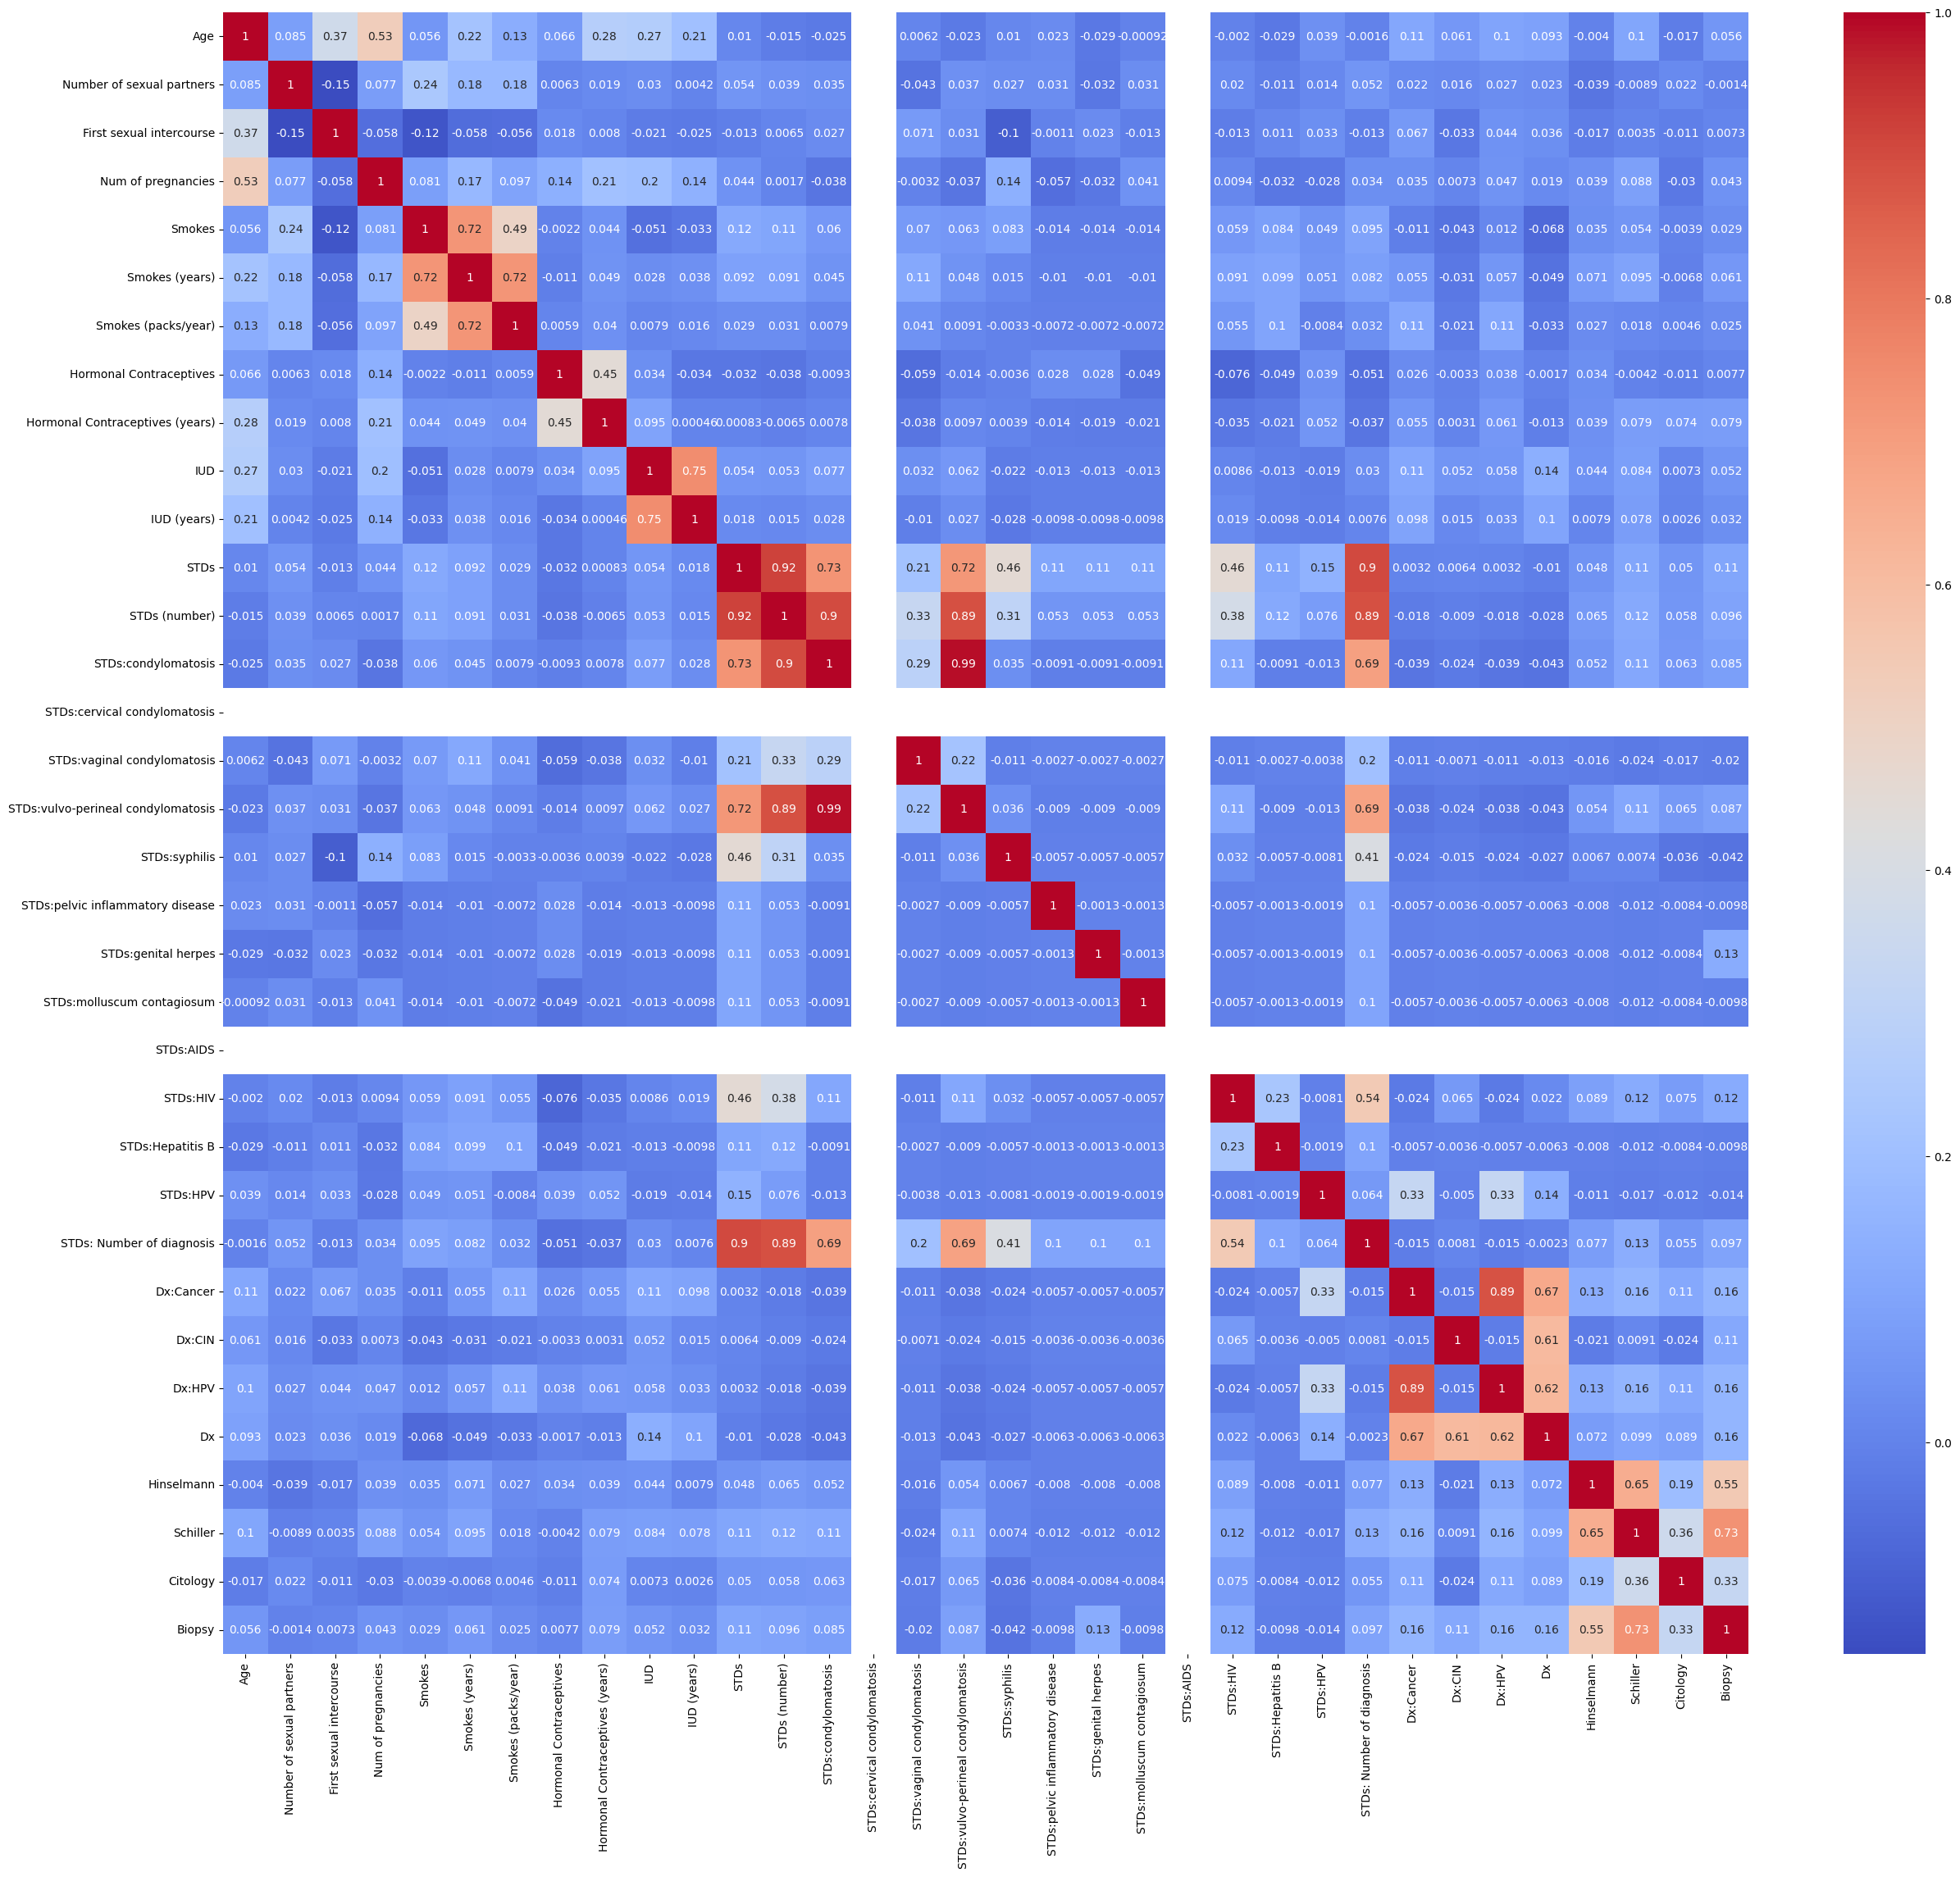

In [ ]:
#Correlation Heatmap
import seaborn as sns
plt.figure(figsize=(30, 26))
sns.heatmap(df_cancer_2.corr(), annot=True, cmap='coolwarm')
plt.show()

**Explaining the Heatmap diagram**

Heat map is used to show relationship between two variables in relation to the target variable.

Strong Correlctaion
1. There is a likelihood of cervical cancer with increased number of pregnacies and age (a correlation of 0.55).
2. There is a correlation of 0.72 between smoke and the number of years smoking. Meaning that the more people smoke, the more the likelihood of developing cervical cancer
3. STDs has the highest risk factor on developing cervical cancer. If with STDs or those who have had STDs in the past have 92% chance of having cervical cancer
4. HPV is a second risk factor for developing cervical cancer: 89% chance

Weak Correlation
1. Pairing these: number of pregnancies, age, and number of sexual partners with other factors have a weakness correlation with developing cervical cancer
2. STDs:Syphillis and number of pregnacies have a weak correlation of developing cervical cancer

Negative correlation
The dark blue boxes show strong negative correlation between a pair of variable and cervical cancer. Look at the Heatmap critically to deduce the variables

In [ ]:
#We want to plot another diagram that will give a more robust relationship between each variable pair and cervical cancer
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(14, 12))
sns.pairplot(df_cancer, hue='Dx:Cancer')
plt.show()

Output hidden; open in https://colab.research.google.com to view.

**Explanation of the graphs above **

##Split the df_cancer data into training and test data

In [ ]:
#Split the data into X_train, y_train, X_test, and y_test
from sklearn.model_selection import train_test_split #import the library to split the data
X = df_cancer_2.drop('Dx:Cancer', axis=1) #drop the target column from the dataframe
y = df_cancer_2['Dx:Cancer']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
X_train

,Age,Number of sexual partners,First sexual intercourse,Num of pregnancies,Smokes,Smokes (years),Smokes (packs/year),Hormonal Contraceptives,Hormonal Contraceptives (years),IUD,...,STDs:Hepatitis B,STDs:HPV,STDs: Number of diagnosis,Dx:CIN,Dx:HPV,Dx,Hinselmann,Schiller,Citology,Biopsy
7,26,1.000000,26.0000,3.0,0.0,0.0,0.00,1.000000,2.000000,1.000000,...,0.000000,0.000000,0,0,0,0,0,0,0,0
192,27,2.000000,17.0000,4.0,0.0,0.0,0.00,1.000000,2.000000,0.000000,...,0.000000,0.000000,0,0,0,0,0,0,0,0
155,28,4.000000,16.0000,2.0,1.0,11.0,2.75,1.000000,6.000000,0.000000,...,0.000000,0.000000,0,0,0,0,0,0,0,0
319,23,1.000000,19.0000,2.0,0.0,0.0,0.00,0.641333,2.256419,0.112011,...,0.001328,0.002656,0,0,0,0,0,0,0,0
101,30,5.000000,16.0000,4.0,0.0,0.0,0.00,0.000000,0.000000,1.000000,...,0.000000,0.000000,1,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
71,34,2.527644,16.9953,3.0,0.0,0.0,0.00,0.641333,2.256419,0.112011,...,0.001328,0.002656,0,0,0,0,0,0,0,0
106,30,4.000000,16.0000,2.0,0.0,0.0,0.00,1.000000,13.000000,0.000000,...,0.000000,0.000000,0,0,0,0,0,0,0,0
270,21,1.000000,17.0000,1.0,0.0,0.0,0.00,1.000000,1.000000,0.000000,...,0.000000,0.000000,0,0,0,0,0,0,0,0
435,17,2.000000,15.0000,1.0,0.0,0.0,0.00,0.000000,0.000000,0.000000,...,0.000000,0.000000,0,0,0,0,0,0,0,0


In [ ]:
y_train

7      0
192    0
155    0
319    0
101    0
      ..
71     0
106    0
270    0
435    0
102    0
Name: Dx:Cancer, Length: 686, dtype: int64

In [ ]:
X_test

,Age,Number of sexual partners,First sexual intercourse,Num of pregnancies,Smokes,Smokes (years),Smokes (packs/year),Hormonal Contraceptives,Hormonal Contraceptives (years),IUD,...,STDs:Hepatitis B,STDs:HPV,STDs: Number of diagnosis,Dx:CIN,Dx:HPV,Dx,Hinselmann,Schiller,Citology,Biopsy
713,16,1.0,16.0,1.0,0.0,0.0,0.000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0,0,0,0,0,0,0,0
604,23,3.0,17.0,2.0,0.0,0.0,0.000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0,0,0,0,0,0,0,0
120,33,1.0,16.0,4.0,0.0,0.0,0.000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0,0,0,0,0,0,0,0
208,27,4.0,16.0,1.0,0.0,0.0,0.000,1.000000,0.670000,0.000000,...,0.000000,0.000000,0,0,0,0,0,0,0,0
380,18,3.0,15.0,1.0,1.0,2.0,0.003,1.000000,0.580000,0.000000,...,0.000000,0.000000,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
610,21,2.0,18.0,3.0,0.0,0.0,0.000,0.000000,0.000000,1.000000,...,0.000000,0.000000,0,0,1,1,1,1,0,1
235,25,2.0,17.0,1.0,0.0,0.0,0.000,1.000000,0.500000,0.000000,...,0.000000,0.000000,0,0,0,0,0,0,0,0
333,22,3.0,17.0,4.0,0.0,0.0,0.000,1.000000,5.000000,0.000000,...,0.000000,0.000000,0,0,0,0,0,0,0,0
215,25,1.0,24.0,1.0,0.0,0.0,0.000,1.000000,0.080000,0.000000,...,0.000000,0.000000,0,0,0,0,0,0,0,0


In [ ]:
y_test

713    0
604    0
120    0
208    0
380    0
      ..
610    1
235    0
333    0
215    0
792    0
Name: Dx:Cancer, Length: 172, dtype: int64

##Creating the first model_1

In [ ]:
#Build the model
tf.random.set_seed(42)
model_1 = tf.keras.Sequential([
    tf.keras.layers.Dense(34),
    tf.keras.layers.Dense(100, activation = 'relu'),
    tf.keras.layers.Dense(64, activation = 'relu'),
    tf.keras.layers.Dense(32, activation = 'relu'),
    tf.keras.layers.Dense(1, activation = 'sigmoid')
])
#Compile the model
model_1.compile(loss = tf.keras.losses.BinaryCrossentropy(),
              optimizer = tf.keras.optimizers.Adam(),
              metrics = ['accuracy'])
#Fit the model
model_1.fit(X_train, y_train, epochs = 20)

Epoch 1/20
22/22 [==============================] - 4s 5ms/step - loss: 0.1296 - accuracy: 0.9796
Epoch 2/20
22/22 [==============================] - 0s 4ms/step - loss: 0.1045 - accuracy: 0.9810
Epoch 3/20
22/22 [==============================] - 0s 4ms/step - loss: 0.1041 - accuracy: 0.9810
Epoch 4/20
22/22 [==============================] - 0s 4ms/step - loss: 0.0905 - accuracy: 0.9810
Epoch 5/20
22/22 [==============================] - 0s 4ms/step - loss: 0.0887 - accuracy: 0.9825
Epoch 6/20
22/22 [==============================] - 0s 4ms/step - loss: 0.0930 - accuracy: 0.9825
Epoch 7/20
22/22 [==============================] - 0s 4ms/step - loss: 0.0831 - accuracy: 0.9825
Epoch 8/20
22/22 [==============================] - 0s 4ms/step - loss: 0.0813 - accuracy: 0.9825
Epoch 9/20
22/22 [==============================] - 0s 4ms/step - loss: 0.0849 - accuracy: 0.9825
Epoch 10/20
22/22 [==============================] - 0s 4ms/step - loss: 0.0737 - accuracy: 0.9825
Epoch 11/20
22/22 [

In [ ]:
model_1.evaluate(X_test, y_test)

11/11 [==============================] - 0s 7ms/step - loss: 0.0019 - accuracy: 0.5145


[0.0018596857553347945, 0.5145348906517029]

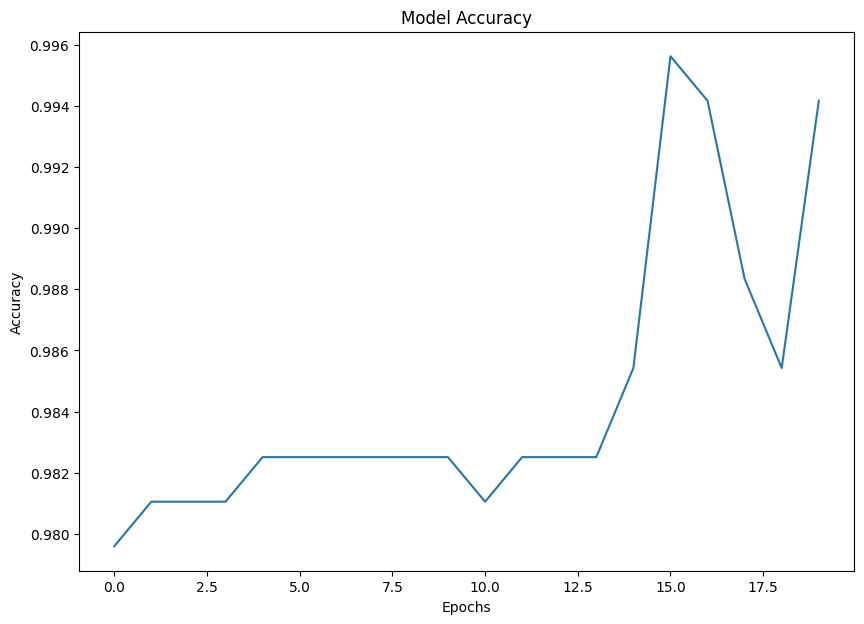

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize = (10, 7))
plt.plot(model_1.history.history['accuracy'])
plt.title('Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.show()

##Data Augumentation

In [ ]:
#A function to generate synthetic data by adding noise
def generate_synthetic_data(df_cancer_2, noise_level = 0.1):
  synthetic_df_cancer_2 = df_cancer_2.copy()
  for col in df_cancer_2.columns:
    if df_cancer_2[col].dtype in [np.float64, np.int64]:
      noise = noise_level * np.random.randn(*df_cancer_2[col].shape)
      synthetic_df_cancer_2[col] += noise
  return synthetic_df_cancer_2

In [ ]:
synthetic_df_cancer_2 = generate_synthetic_data(df_cancer_2, noise_level = 0.1)
synthetic_df_cancer_2

,Age,Number of sexual partners,First sexual intercourse,Num of pregnancies,Smokes,Smokes (years),Smokes (packs/year),Hormonal Contraceptives,Hormonal Contraceptives (years),IUD,...,STDs:HPV,STDs: Number of diagnosis,Dx:Cancer,Dx:CIN,Dx:HPV,Dx,Hinselmann,Schiller,Citology,Biopsy
0,17.960095,4.028980,15.015244,0.961088,0.166894,0.040958,0.061351,-0.003609,-0.054470,-0.001967,...,-0.078003,0.008908,-0.052317,-0.150583,0.107023,-0.011670,0.010228,0.031508,0.142399,0.118207
1,15.083778,0.877693,13.952136,0.933092,0.177930,-0.121322,0.085461,-0.114642,-0.023068,0.114860,...,-0.096688,0.049858,-0.023899,-0.138681,-0.018948,0.041256,-0.124877,-0.208462,-0.158380,-0.094934
2,33.899233,0.954852,16.934338,1.030056,0.051367,0.105105,0.238100,0.011602,-0.009780,-0.081864,...,-0.245391,-0.090605,0.037577,-0.031621,0.120152,-0.035614,-0.067961,0.025585,-0.063713,-0.034385
3,51.933323,4.853563,15.783149,3.992519,0.970854,36.997636,36.915736,0.996498,2.888481,0.086629,...,-0.019503,-0.012367,0.834176,-0.017960,1.028054,0.048845,0.102715,-0.019862,0.056158,-0.092824
4,45.936166,3.058606,21.123435,4.194657,0.115976,-0.052415,-0.078120,0.994438,14.902782,0.067079,...,0.132656,-0.025816,0.088606,-0.069581,-0.047075,-0.041076,0.083333,0.099758,-0.008136,-0.073724
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
853,34.151876,3.077757,18.033793,0.008242,0.012933,0.068525,-0.034089,0.260561,-0.089530,0.029766,...,-0.161549,-0.187678,0.058304,-0.113702,0.080282,-0.060902,-0.061888,-0.063684,0.130288,0.078929
854,32.081213,1.907490,18.857398,0.911248,-0.193187,0.088906,-0.059654,1.016853,7.998666,0.339316,...,0.087930,0.057876,-0.031980,0.142748,-0.084762,-0.001641,-0.023920,-0.129204,0.043428,-0.021963
855,24.970581,1.909055,17.251729,0.003974,-0.128929,-0.214070,-0.118522,0.906471,0.147014,-0.038639,...,-0.072400,0.147515,-0.017097,-0.127420,-0.017505,-0.090768,-0.029329,0.035243,0.977212,0.019279
856,32.947971,1.966657,24.007280,1.966810,0.032230,0.119572,-0.043568,0.960452,0.065922,0.292765,...,0.220845,0.021224,0.029742,0.003309,-0.059468,-0.016580,0.025313,-0.104949,0.000836,-0.017173


In [ ]:
#Combining existing features to create new features
df_cancer_combined = pd.concat([df_cancer_2, synthetic_df_cancer_2])
df_cancer_combined

,Age,Number of sexual partners,First sexual intercourse,Num of pregnancies,Smokes,Smokes (years),Smokes (packs/year),Hormonal Contraceptives,Hormonal Contraceptives (years),IUD,...,STDs:HPV,STDs: Number of diagnosis,Dx:Cancer,Dx:CIN,Dx:HPV,Dx,Hinselmann,Schiller,Citology,Biopsy
0,18.000000,4.000000,15.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,15.000000,1.000000,14.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2,34.000000,1.000000,16.995300,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
3,52.000000,5.000000,16.000000,4.000000,1.000000,37.000000,37.000000,1.000000,3.000000,0.000000,...,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
4,46.000000,3.000000,21.000000,4.000000,0.000000,0.000000,0.000000,1.000000,15.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
853,34.151876,3.077757,18.033793,0.008242,0.012933,0.068525,-0.034089,0.260561,-0.089530,0.029766,...,-0.161549,-0.187678,0.058304,-0.113702,0.080282,-0.060902,-0.061888,-0.063684,0.130288,0.078929
854,32.081213,1.907490,18.857398,0.911248,-0.193187,0.088906,-0.059654,1.016853,7.998666,0.339316,...,0.087930,0.057876,-0.031980,0.142748,-0.084762,-0.001641,-0.023920,-0.129204,0.043428,-0.021963
855,24.970581,1.909055,17.251729,0.003974,-0.128929,-0.214070,-0.118522,0.906471,0.147014,-0.038639,...,-0.072400,0.147515,-0.017097,-0.127420,-0.017505,-0.090768,-0.029329,0.035243,0.977212,0.019279
856,32.947971,1.966657,24.007280,1.966810,0.032230,0.119572,-0.043568,0.960452,0.065922,0.292765,...,0.220845,0.021224,0.029742,0.003309,-0.059468,-0.016580,0.025313,-0.104949,0.000836,-0.017173


##Spliting the augumented data

In [ ]:
#Split the data into X_train, y_train, X_test, and y_test
from sklearn.model_selection import train_test_split #import the library to split the data
X = df_cancer_combined.drop('Dx:Cancer', axis=1) #drop the target column from the dataframe
y = df_cancer_combined['Dx:Cancer']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
X_train

,Age,Number of sexual partners,First sexual intercourse,Num of pregnancies,Smokes,Smokes (years),Smokes (packs/year),Hormonal Contraceptives,Hormonal Contraceptives (years),IUD,...,STDs:Hepatitis B,STDs:HPV,STDs: Number of diagnosis,Dx:CIN,Dx:HPV,Dx,Hinselmann,Schiller,Citology,Biopsy
670,47.000000,2.000000,17.000000,3.000000,0.000000,0.000000,0.000000,1.000000,20.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000
798,25.000000,4.000000,17.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
848,31.131584,2.905099,17.976378,1.085977,-0.123434,-0.134880,0.011368,1.173006,0.659912,0.070622,...,-0.166702,-0.071976,0.088746,-0.013090,-0.070470,-0.013555,0.232673,-0.050731,-0.043611,-0.019779
197,25.950038,4.838385,17.970351,2.156923,0.025156,-0.127819,0.086206,1.053106,1.071487,0.122648,...,0.082000,0.038149,-0.071530,1.074130,0.026282,0.822672,0.174391,0.132986,0.058719,-0.106031
49,37.019726,3.140781,17.987776,2.988882,-0.118447,-0.115211,-0.209944,0.891111,0.337908,0.091373,...,-0.001102,-0.135898,0.139078,0.003000,0.007055,0.014724,0.057859,-0.084114,0.136227,-0.112394
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
272,22.996512,2.600601,17.007447,2.253225,0.191267,-0.052907,-0.008796,0.679486,2.103897,0.180964,...,-0.110580,0.171695,-0.042833,0.158351,-0.050933,-0.103616,0.022391,0.070993,0.116199,0.149215
436,15.917990,2.874649,13.858871,1.022070,-0.050917,0.122082,-0.132643,0.648695,2.369626,0.140846,...,-0.158486,0.018047,-0.122216,0.030629,-0.019471,-0.178031,0.114330,-0.196070,0.964334,-0.058015
2,33.899233,0.954852,16.934338,1.030056,0.051367,0.105105,0.238100,0.011602,-0.009780,-0.081864,...,0.156163,-0.245391,-0.090605,-0.031621,0.120152,-0.035614,-0.067961,0.025585,-0.063713,-0.034385
601,27.942400,2.888495,17.912392,1.909549,-0.060890,0.002921,0.071491,0.987432,6.122521,0.086732,...,0.049888,-0.120119,-0.088439,-0.100847,-0.059068,0.042073,-0.000315,0.174037,0.180711,0.062549


In [ ]:
y_train

670    0.000000
798    0.000000
848   -0.009232
197    0.076487
49    -0.022361
         ...   
272    0.028537
436   -0.023687
2      0.037577
601    0.043995
268   -0.075055
Name: Dx:Cancer, Length: 1372, dtype: float64

In [ ]:
X_test

,Age,Number of sexual partners,First sexual intercourse,Num of pregnancies,Smokes,Smokes (years),Smokes (packs/year),Hormonal Contraceptives,Hormonal Contraceptives (years),IUD,...,STDs:Hepatitis B,STDs:HPV,STDs: Number of diagnosis,Dx:CIN,Dx:HPV,Dx,Hinselmann,Schiller,Citology,Biopsy
599,20.000000,2.000000,16.000000,1.000000,1.000000,5.000000,0.750000,1.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
489,19.136872,4.039193,13.926243,1.910627,0.023549,0.100190,0.086901,0.492109,2.369807,0.014851,...,-0.074397,0.056944,-0.003776,-0.002395,-0.000455,0.029117,0.109340,-0.050973,0.010982,0.040194
115,34.000000,3.000000,13.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
135,27.000000,3.000000,15.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
339,20.000000,2.000000,18.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.080000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
338,20.055945,4.832240,13.864946,3.086446,1.069922,4.026447,2.940777,0.584425,2.296972,-0.183693,...,0.145755,0.031360,0.024613,-0.048537,0.100626,-0.019514,0.161199,0.068739,-0.019607,-0.197439
107,33.000000,5.000000,19.000000,1.000000,1.000000,4.000000,0.513202,1.000000,2.282201,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
148,32.888060,3.118883,18.054575,5.046082,-0.052105,0.028367,0.063601,1.130819,1.110297,-0.086339,...,-0.038127,-0.089227,0.064222,-0.066926,-0.035224,-0.013059,0.012544,0.081955,0.041349,-0.025758
839,31.208959,3.035143,19.059447,1.070523,0.059045,-0.058228,-0.019927,0.921910,0.042639,0.926119,...,-0.079936,0.001960,-0.054080,0.016449,0.095969,0.966983,-0.040309,0.026398,-0.372290,0.069111


In [ ]:
y_test

599    0.000000
489    0.037466
115    0.000000
135    0.000000
339    0.000000
         ...   
338    0.161078
107    0.000000
148    0.194930
839    1.104994
210    0.037126
Name: Dx:Cancer, Length: 344, dtype: float64

##Building the second model with augumented data. model_2

In [ ]:
#Build the model
tf.random.set_seed(42)
model_2 = tf.keras.Sequential([
    tf.keras.layers.Dense(34),
    tf.keras.layers.Dense(100, activation = 'relu'),
    tf.keras.layers.Dense(64, activation = 'relu'),
    tf.keras.layers.Dense(32, activation = 'relu'),
    tf.keras.layers.Dense(1, activation = 'sigmoid')
])
#Compile the model
model_2.compile(loss = tf.keras.losses.BinaryCrossentropy(),
              optimizer = tf.keras.optimizers.Adam(),
              metrics = ['accuracy'])
#Fit the model
model_2.fit(X_train, y_train, epochs = 20)

Epoch 1/20
43/43 [==============================] - 3s 5ms/step - loss: 0.1269 - accuracy: 0.4862
Epoch 2/20
43/43 [==============================] - 0s 4ms/step - loss: 0.1060 - accuracy: 0.4862
Epoch 3/20
43/43 [==============================] - 0s 4ms/step - loss: 0.0967 - accuracy: 0.4869
Epoch 4/20
43/43 [==============================] - 0s 3ms/step - loss: 0.0823 - accuracy: 0.4869
Epoch 5/20
43/43 [==============================] - 0s 3ms/step - loss: 0.0750 - accuracy: 0.4854
Epoch 6/20
43/43 [==============================] - 0s 4ms/step - loss: 0.0667 - accuracy: 0.4869
Epoch 7/20
43/43 [==============================] - 0s 4ms/step - loss: 0.0599 - accuracy: 0.4869
Epoch 8/20
43/43 [==============================] - 0s 4ms/step - loss: 0.0537 - accuracy: 0.4883
Epoch 9/20
43/43 [==============================] - 0s 4ms/step - loss: 0.0321 - accuracy: 0.4905
Epoch 10/20
43/43 [==============================] - 0s 4ms/step - loss: 0.0577 - accuracy: 0.4898
Epoch 11/20
43/43 [

In [ ]:
model_2.evaluate(X_test, y_test)

11/11 [==============================] - 0s 4ms/step - loss: -0.1234 - accuracy: 0.5116


[-0.12339272350072861, 0.5116279125213623]

##Data Normalization of the first model

In [ ]:
#Splitting the cancer_2 dataset in train and test data
X = df_cancer_2.drop('Dx:Cancer', axis=1) #drop the target column from the dataframe
y = df_cancer_2['Dx:Cancer']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
#Normalized the X_train and X_test dataset
X_train_normalized=(X_train-X_train.mean())/X_train.std()
X_test_normalized=(X_test-X_test.mean())/X_test.std()

In [ ]:
X_train_normalized

,Age,Number of sexual partners,First sexual intercourse,Num of pregnancies,Smokes,Smokes (years),Smokes (packs/year),Hormonal Contraceptives,Hormonal Contraceptives (years),IUD,...,STDs:Hepatitis B,STDs:HPV,STDs: Number of diagnosis,Dx:CIN,Dx:HPV,Dx,Hinselmann,Schiller,Citology,Biopsy
7,-0.081469,-0.905123,3.246477,0.517714,-0.403056,-0.284860,-0.190964,0.794363,-0.074501,3.225567,...,-0.388312,-0.047310,-0.290295,-0.101461,-0.138882,-0.159292,-0.202266,-0.300812,-0.245337,-0.261603
192,0.040824,-0.321631,0.011022,1.242697,-0.403056,-0.284860,-0.190964,0.794363,-0.074501,-0.366408,...,-0.388312,-0.047310,-0.290295,-0.101461,-0.138882,-0.159292,-0.202266,-0.300812,-0.245337,-0.261603
155,0.163116,0.845352,-0.348473,-0.207270,2.519700,2.447107,1.088111,0.794363,1.071947,-0.366408,...,-0.388312,-0.047310,-0.290295,-0.101461,-0.138882,-0.159292,-0.202266,-0.300812,-0.245337,-0.261603
319,-0.448347,-0.905123,0.730012,-0.207270,-0.403056,-0.284860,-0.190964,-0.008097,-0.001008,0.035932,...,2.571492,0.022261,-0.290295,-0.101461,-0.138882,-0.159292,-0.202266,-0.300812,-0.245337,-0.261603
101,0.407702,1.428844,-0.348473,1.242697,-0.403056,-0.284860,-0.190964,-1.442978,-0.647725,3.225567,...,-0.388312,-0.047310,2.921683,-0.101461,-0.138882,-0.159292,-0.202266,-0.300812,4.070081,-0.261603
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
71,0.896872,-0.013755,0.009332,0.517714,-0.403056,-0.284860,-0.190964,-0.008097,-0.001008,0.035932,...,2.571492,0.022261,-0.290295,-0.101461,-0.138882,-0.159292,-0.202266,-0.300812,-0.245337,-0.261603
106,0.407702,0.845352,-0.348473,-0.207270,-0.403056,-0.284860,-0.190964,0.794363,3.078230,-0.366408,...,-0.388312,-0.047310,-0.290295,-0.101461,-0.138882,-0.159292,-0.202266,-0.300812,-0.245337,-0.261603
270,-0.692932,-0.905123,0.011022,-0.932253,-0.403056,-0.284860,-0.190964,0.794363,-0.361113,-0.366408,...,-0.388312,-0.047310,-0.290295,-0.101461,-0.138882,-0.159292,-0.202266,-0.300812,-0.245337,-0.261603
435,-1.182103,-0.321631,-0.707968,-0.932253,-0.403056,-0.284860,-0.190964,-1.442978,-0.647725,-0.366408,...,-0.388312,-0.047310,-0.290295,-0.101461,-0.138882,-0.159292,-0.202266,-0.300812,-0.245337,-0.261603


In [ ]:
#Convert X_train and X_test dataset to positives
X_train_abs = np.abs(X_train_normalized)
X_test_abs = np.abs(X_test_normalized)

In [ ]:
X_train_abs

,Age,Number of sexual partners,First sexual intercourse,Num of pregnancies,Smokes,Smokes (years),Smokes (packs/year),Hormonal Contraceptives,Hormonal Contraceptives (years),IUD,...,STDs:Hepatitis B,STDs:HPV,STDs: Number of diagnosis,Dx:CIN,Dx:HPV,Dx,Hinselmann,Schiller,Citology,Biopsy
7,0.081469,0.905123,3.246477,0.517714,0.403056,0.284860,0.190964,0.794363,0.074501,3.225567,...,0.388312,0.047310,0.290295,0.101461,0.138882,0.159292,0.202266,0.300812,0.245337,0.261603
192,0.040824,0.321631,0.011022,1.242697,0.403056,0.284860,0.190964,0.794363,0.074501,0.366408,...,0.388312,0.047310,0.290295,0.101461,0.138882,0.159292,0.202266,0.300812,0.245337,0.261603
155,0.163116,0.845352,0.348473,0.207270,2.519700,2.447107,1.088111,0.794363,1.071947,0.366408,...,0.388312,0.047310,0.290295,0.101461,0.138882,0.159292,0.202266,0.300812,0.245337,0.261603
319,0.448347,0.905123,0.730012,0.207270,0.403056,0.284860,0.190964,0.008097,0.001008,0.035932,...,2.571492,0.022261,0.290295,0.101461,0.138882,0.159292,0.202266,0.300812,0.245337,0.261603
101,0.407702,1.428844,0.348473,1.242697,0.403056,0.284860,0.190964,1.442978,0.647725,3.225567,...,0.388312,0.047310,2.921683,0.101461,0.138882,0.159292,0.202266,0.300812,4.070081,0.261603
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
71,0.896872,0.013755,0.009332,0.517714,0.403056,0.284860,0.190964,0.008097,0.001008,0.035932,...,2.571492,0.022261,0.290295,0.101461,0.138882,0.159292,0.202266,0.300812,0.245337,0.261603
106,0.407702,0.845352,0.348473,0.207270,0.403056,0.284860,0.190964,0.794363,3.078230,0.366408,...,0.388312,0.047310,0.290295,0.101461,0.138882,0.159292,0.202266,0.300812,0.245337,0.261603
270,0.692932,0.905123,0.011022,0.932253,0.403056,0.284860,0.190964,0.794363,0.361113,0.366408,...,0.388312,0.047310,0.290295,0.101461,0.138882,0.159292,0.202266,0.300812,0.245337,0.261603
435,1.182103,0.321631,0.707968,0.932253,0.403056,0.284860,0.190964,1.442978,0.647725,0.366408,...,0.388312,0.047310,0.290295,0.101461,0.138882,0.159292,0.202266,0.300812,0.245337,0.261603


In [ ]:
X_test_abs

,Age,Number of sexual partners,First sexual intercourse,Num of pregnancies,Smokes,Smokes (years),Smokes (packs/year),Hormonal Contraceptives,Hormonal Contraceptives (years),IUD,...,STDs:Hepatitis B,STDs:HPV,STDs: Number of diagnosis,Dx:CIN,Dx:HPV,Dx,Hinselmann,Schiller,Citology,Biopsy
713,1.182104,1.086909,0.387181,0.834118,0.463306,0.361185,0.256094,1.373377,0.614883,0.441225,...,0.077776,0.079302,0.285106,0.108149,0.172528,0.205372,0.220220,0.330212,0.172528,0.260626
604,0.458539,0.429403,0.034826,0.158358,0.463306,0.361185,0.256094,1.373377,0.614883,0.441225,...,0.077776,0.079302,0.285106,0.108149,0.172528,0.205372,0.220220,0.330212,0.172528,0.260626
120,0.575126,1.086909,0.387181,1.193160,0.463306,0.361185,0.256094,1.373377,0.614883,0.441225,...,0.077776,0.079302,0.285106,0.108149,0.172528,0.205372,0.220220,0.330212,0.172528,0.260626
208,0.045073,1.187559,0.387181,0.834118,0.463306,0.361185,0.256094,0.817369,0.431163,0.441225,...,0.077776,0.079302,0.285106,0.108149,0.172528,0.205372,0.220220,0.330212,0.172528,0.260626
380,0.975371,0.429403,0.739536,0.834118,2.167454,0.117231,0.254860,0.817369,0.455841,0.441225,...,0.077776,0.079302,0.285106,0.108149,0.172528,0.205372,0.220220,0.330212,0.172528,0.260626
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
610,0.665272,0.328753,0.317529,0.517401,0.463306,0.361185,0.256094,1.373377,0.614883,2.463324,...,0.077776,0.079302,0.285106,0.108149,5.762449,4.840907,4.514511,3.010754,0.172528,3.814612
235,0.251806,0.328753,0.034826,0.834118,0.463306,0.361185,0.256094,0.817369,0.477778,0.441225,...,0.077776,0.079302,0.285106,0.108149,0.172528,0.205372,0.220220,0.330212,0.172528,0.260626
333,0.561905,0.429403,0.034826,1.193160,0.463306,0.361185,0.256094,0.817369,0.756162,0.441225,...,0.077776,0.079302,0.285106,0.108149,0.172528,0.205372,0.220220,0.330212,0.172528,0.260626
215,0.251806,1.086909,2.431660,0.834118,0.463306,0.361185,0.256094,0.817369,0.592946,0.441225,...,0.077776,0.079302,0.285106,0.108149,0.172528,0.205372,0.220220,0.330212,0.172528,0.260626


##Building model 3 from the normalized and abs dataset

In [ ]:
#Build the model
tf.random.set_seed(42)
model_3 = tf.keras.Sequential([
    tf.keras.layers.Dense(34),
    tf.keras.layers.Dense(100, activation = 'relu'),
    tf.keras.layers.Dense(64, activation = 'relu'),
    tf.keras.layers.Dense(32, activation = 'relu'),
    tf.keras.layers.Dense(1, activation = 'sigmoid')
])
#Compile the model
model_3.compile(loss = tf.keras.losses.BinaryCrossentropy(),
              optimizer = tf.keras.optimizers.Adam(),
              metrics = ['accuracy'])
#Fit the model
model_3.fit(X_train_abs, y_train, epochs = 20)

Epoch 1/20
22/22 [==============================] - 2s 4ms/step - loss: nan - accuracy: 0.9810
Epoch 2/20
22/22 [==============================] - 0s 4ms/step - loss: nan - accuracy: 0.9810
Epoch 3/20
22/22 [==============================] - 0s 4ms/step - loss: nan - accuracy: 0.9810
Epoch 4/20
22/22 [==============================] - 0s 4ms/step - loss: nan - accuracy: 0.9810
Epoch 5/20
22/22 [==============================] - 0s 4ms/step - loss: nan - accuracy: 0.9810
Epoch 6/20
22/22 [==============================] - 0s 4ms/step - loss: nan - accuracy: 0.9810
Epoch 7/20
22/22 [==============================] - 0s 4ms/step - loss: nan - accuracy: 0.9810
Epoch 8/20
22/22 [==============================] - 0s 4ms/step - loss: nan - accuracy: 0.9810
Epoch 9/20
22/22 [==============================] - 0s 4ms/step - loss: nan - accuracy: 0.9810
Epoch 10/20
22/22 [==============================] - 0s 4ms/step - loss: nan - accuracy: 0.9810
Epoch 11/20
22/22 [==============================

In [ ]:
model_3.evaluate(X_test_abs, y_test)

6/6 [==============================] - 0s 14ms/step - loss: nan - accuracy: 0.9709


[nan, 0.9709302186965942]

In [ ]:
plt.figure(figsize = (10, 7))
plt.plot(model_3.history.history['accuracy'])
plt.title('Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.show()

KeyError: 'accuracy'

<Figure size 1000x700 with 0 Axes>